In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.manifold import TSNE

In [2]:
q=np.load('C:\\Users\\admin\\Desktop\\GAN\\ocan2\\OCAN-master\\data\\wiki\\ben_hid_emd_4_50_8_200_r0.npy')

In [3]:
q.shape

(10528, 200)

In [3]:
print(os.listdir("C:\\Users\\admin\\Desktop\\GAN\\hmeq-data"))
df=pd.read_csv("C:\\Users\\admin\\Desktop\\GAN\\hmeq-data\\hmeq.csv")
#print(df.columns.values)
df.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
df.dropna(axis=0,how='any',inplace=True)
#df=pd.get_dummies(df,columns=['REASON','JOB'])
df=df.drop('REASON',axis=1)
df=df.drop('JOB',axis=1,)
a=df[df["BAD"]<0.5]
b=df[df['BAD']>0.5]
C_begin=a.drop('BAD',axis=1)
C_vandal=b.drop('BAD',axis=1)
C_begin
from sklearn import preprocessing
cb_scaled=preprocessing.scale(C_begin)
cv_scaled=preprocessing.scale(C_vandal)
df
#X_scaled=pd.DataFrame(X_,columns=X.columns)
#X_scaled
#print(cv_scaled)
#c=np.array(cb_scaled)
#d=np.array(cv_scaled)
C_vandal.shape
#np.save('C:\\Users\\admin\\Desktop\\GAN\\HMEQ\\OCAN-master\\data',d)



['hmeq.csv']


(300, 10)

In [4]:
a=pd.concat([C_begin,C_vandal],axis=0)
tsne=TSNE(n_components=2,init='pca',random_state=501)
A_tsne=tsne.fit_transform(a) 
#B_tsne = tsne.fit_transform(C_begin)
#V_tsne=tsne.fit_transform(C_vandal)

In [10]:
#B_tsne.shape

(3064, 2)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


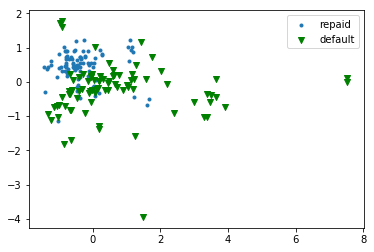

In [5]:
A_tsne=preprocessing.scale(A_tsne)
plt.figure()
plt.scatter(A_tsne[106:200,0],A_tsne[106:200,1],label='repaid',marker='.')
plt.scatter(A_tsne[3280:,0],A_tsne[3280:,1],marker='v',label='default',c='g')
#plt.scatter(B_tsne[:,0],B_tsne[:,1],marker='.')
#plt.scatter(V_tsne[:,0],V_tsne[:,1],c='g',marker='.')
plt.legend()
plt.savefig('jiangwei')
plt.show()

In [6]:
from sklearn.decomposition import PCA  
pca=PCA(n_components=2)
A_pca=pca.fit_transform(a)

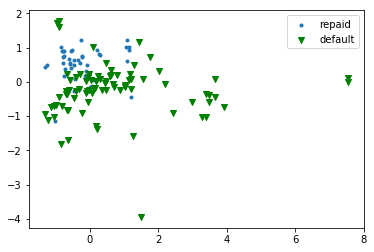

In [14]:
A_pca.shape
A_pca=preprocessing.scale(A_pca)
plt.figure()
plt.scatter(A_pca[106:200,0],A_pca[106:200,1],label='repaid',marker='.')
plt.scatter(A_pca[3280:,0],A_pca[3280:,1],marker='v',label='default',c='g')
plt.legend()
plt.savefig('pca')

Text(0.5,1,'Using sklearn MDS')

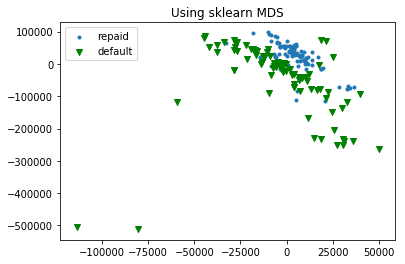

In [15]:
from sklearn.manifold import MDS
mds=MDS(n_components=2)
mds.fit(a)
digits_t2=mds.fit_transform(a)

plt.scatter(digits_t2[106:200,0],digits_t2[106:200,1],label='repaid',marker='.' )
plt.scatter(digits_t2[3280:,0],digits_t2[3280:,1],label='default',marker='v',c='g')
plt.legend()
#plt.savefig('MDS')
plt.title('Using sklearn MDS')


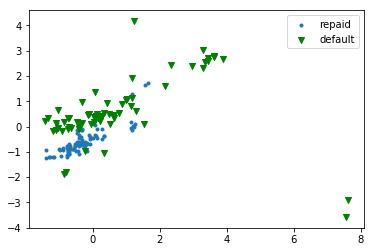

In [12]:
c=preprocessing.scale(digits_t2)
plt.scatter(c[106:200,0],c[106:200,1],label='repaid',marker='.' )
plt.scatter(c[3299:,0],c[3299:,1],label='default',marker='v',c='g')
plt.legend()
plt.savefig('MDS')
